In [1]:
import pandas as pd       # For mathematical calculations 
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
cc = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
cc.head()


,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
cc.shape

(42, 2)

In [4]:
cc.columns  

Index(['Quarter', 'Sales'], dtype='object')

In [5]:
# Rename columns
cc.columns = ['quar', 'sale']

In [6]:
cc.columns   # Check colum name

Index(['quar', 'sale'], dtype='object')

In [7]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   quar    42 non-null     object 
 1   sale    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [8]:
cc.describe() 

,sale
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [9]:
cc.isna().sum()

quar    0
sale    0
dtype: int64

In [10]:
print(cc['quar'].unique())
print(cc['sale'].unique())

['Q1_86' 'Q2_86' 'Q3_86' 'Q4_86' 'Q1_87' 'Q2_87' 'Q3_87' 'Q4_87' 'Q1_88'
 'Q2_88' 'Q3_88' 'Q4_88' 'Q1_89' 'Q2_89' 'Q3_89' 'Q4_89' 'Q1_90' 'Q2_90'
 'Q3_90' 'Q4_90' 'Q1_91' 'Q2_91' 'Q3_91' 'Q4_91' 'Q1_92' 'Q2_92' 'Q3_92'
 'Q4_92' 'Q1_93' 'Q2_93' 'Q3_93' 'Q4_93' 'Q1_94' 'Q2_94' 'Q3_94' 'Q4_94'
 'Q1_95' 'Q2_95' 'Q3_95' 'Q4_95' 'Q1_96' 'Q2_96']
[1734.82699966 2244.96099854 2533.80499268 2154.96299744 1547.81899643
 2104.41199493 2014.36299896 1991.74699783 1869.04999924 2313.63199615
 2128.31999969 2026.82899857 1910.60399628 2331.16499329 2206.54999542
 2173.96799469 2148.27799988 2739.30799866 2792.7539978  2556.00999451
 2480.97399902 3039.522995   3172.11599731 2879.00099945 2772.
 3550.         3508.         3243.85999298 3056.         3899.
 3629.         3373.         3352.         4342.         4461.
 4017.         3854.         4936.         4895.         4333.
 4194.         5253.        ]


In [11]:
cc[cc.duplicated()] 

,quar,sale


In [12]:
cc.corr()

,sale
sale,1.0


# Visualization

In [13]:
# For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

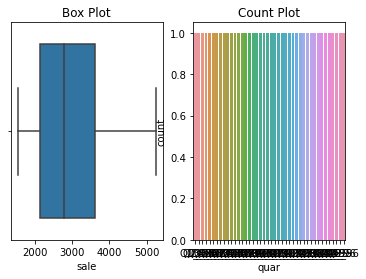

In [14]:
plt.subplot(1,2,1)
sns.boxplot(x = 'sale', data = cc);plt.title("Box Plot")
plt.subplot(1,2,2)
sns.countplot( x = 'quar', data = cc);plt.title("Count Plot")
plt.show()

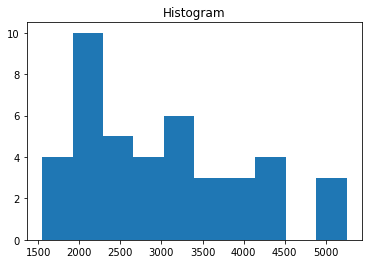

In [15]:
plt.hist( x = 'sale', data = cc);plt.title("Histogram")  # Histogram represents skewness and distribution of data
plt.show()

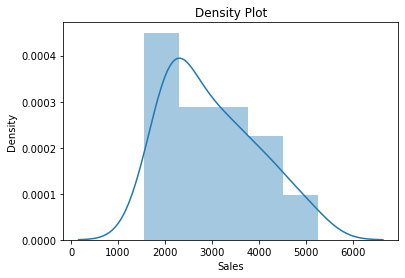

In [16]:
sns.distplot(x = cc.sale);plt.xlabel('Sales');plt.title("Density Plot")  # Shows the Distribution of data
plt.show()

# Converting the Quarters into Years

In [17]:
cc['quarter_year'] = cc['quar'].str.split('_').apply(lambda x : ' 19'.join(x[:]))
#Clean way to convert quarterly periods to datetime in pandas
cc.head()

,quar,sale,quarter_year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987


# Coverting Quarter Years with Quarter Start Date Year (Date Month and Year)

In [18]:
# converting into datetime formate as the index was not in correct formate.
cc['Date'] = (pd.to_datetime(cc['quarter_year'].str.split(' ').apply(lambda x: ''.join(x[::-1])) ,dayfirst=True))
cc.head(10)

,quar,sale,quarter_year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [21]:
cc['quarters'] = 0

for i in range(42):
    n = cc['quar'][i]
    cc['quarters'][i] = n[0:2]
    
cc.head()

,quar,sale,quarter_year,Date,quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1


In [22]:
dummy = pd.DataFrame(pd.get_dummies(cc['quarters']))
cc1 = pd.concat((cc, dummy), axis=1)

cc1.head()

,quar,sale,quarter_year,Date,quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0


In [23]:
# Dropping all the unnecessary column
cc1.drop(['quar','quarter_year'], axis = 1, inplace = True)
cc1.head()

,sale,Date,quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0


In [24]:
# Making the Date as DateTime index for the Dataframe¶
cc1.set_index('Date', inplace = True)
cc1.index.year

Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='Date')

In [25]:
# Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data
cc["Date"] = pd.to_datetime(cc.Date, format = "%b-%y")
cc['month'] = cc.Date.dt.strftime("%b")
cc["year"] = cc.Date.dt.strftime("%Y")
cc.head()

,quar,sale,quarter_year,Date,quarters,month,year
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,Jan,1986
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,Apr,1986
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,Jul,1986
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,Oct,1986
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,Jan,1987


In [ ]:
# Sampling
# Linear interpolation

In [26]:
upsampled_month = cc1.drop(['quarters', 'Q1','Q2','Q3','Q4'], axis = 1)
upsampled_month = upsampled_month.resample('M').mean()
print(upsampled_month.head(10))

                   sale
Date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997


                   sale
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997


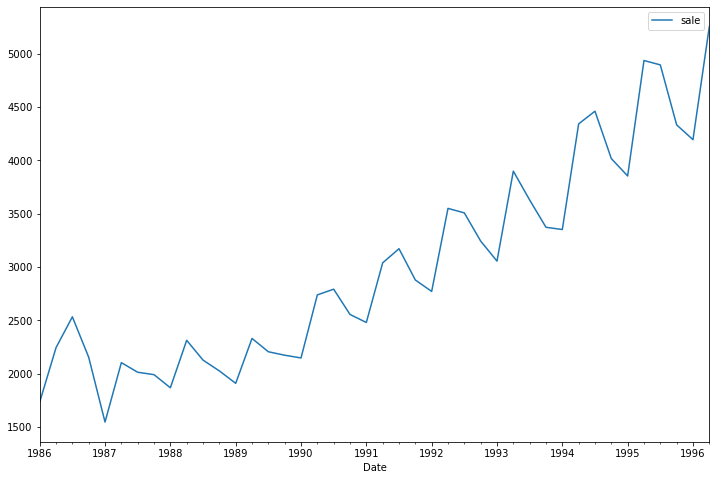

In [27]:
interpolated_month = upsampled_month.interpolate(method='linear')
print(interpolated_month.head(10))
interpolated_month.plot(figsize=(12,8))
plt.show()

In [28]:
interpolated_month

,sale
Date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


# Splitting Train and Test Data

In [29]:
train_data = interpolated_month[:100]
test_data = interpolated_month[100:]

In [30]:
print('Train: ', train_data.index.min(), train_data.index.max(), '\n', 
     'Test: ', test_data.index.min(), test_data.index.max())

Train:  1986-01-31 00:00:00 1994-04-30 00:00:00 
 Test:  1994-05-31 00:00:00 1996-04-30 00:00:00


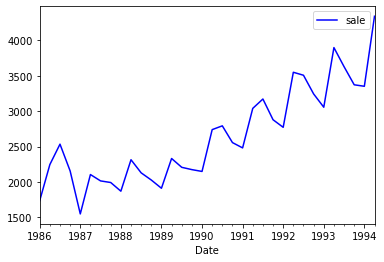

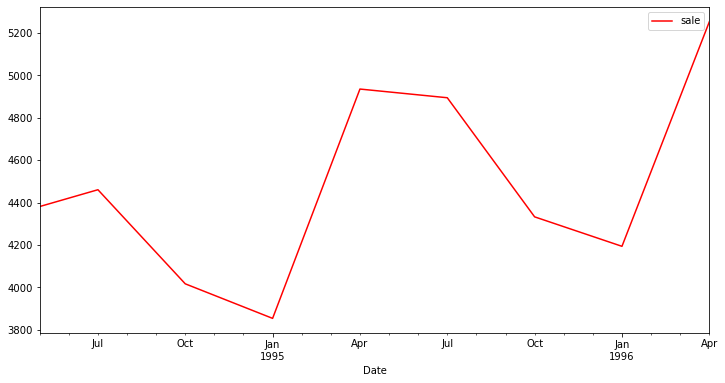

In [31]:
train_data.plot(legend = True, label = "TRAIN", color = 'blue')
test_data.plot(legend = True, label ="TEST", figsize=(12,6), color = 'red')
plt.show()

# Test of Stationarity

In [32]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    cctest = adfuller(timeseries['sale'], autolag='AIC')
    ccoutput = pd.Series(cctest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in cctest[4].items():
        ccoutput['Critical Value (%s)'%key] = value
    print(ccoutput)

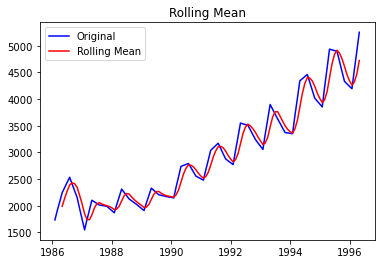

Results of Dickey Fuller Test:
Test Statistic                   0.572599
p-value                          0.986920
#Lags Used                      10.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


In [33]:
from statsmodels.tsa.stattools import adfuller
sales= pd.DataFrame()
sales['sale'] = interpolated_month[['sale']]
test_stationarity(sales)

In [34]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [35]:
adf_test(sales.sale)

Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
# Feature Scaling (Transformations)
# Square Root Transform

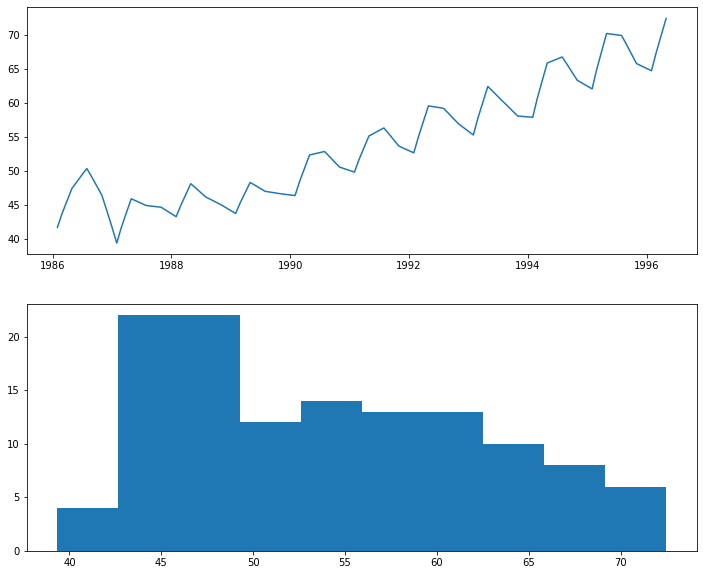

In [36]:
import numpy as np
square_root= pd.DataFrame()
square_root = interpolated_month[['sale']]
square_root['sale'] = np.sqrt(square_root.sale)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['sale'])
#Histogram
plt.subplot(212)
plt.hist(square_root['sale'])
plt.show()

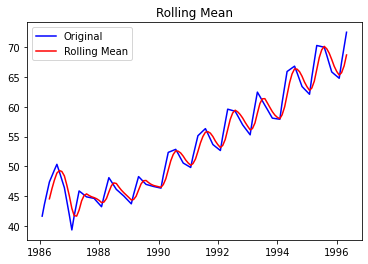

Results of Dickey Fuller Test:
Test Statistic                   0.728012
p-value                          0.990381
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [37]:
test_stationarity(square_root)

In [38]:
adf_test(square_root.sale)

Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
# Log Transform

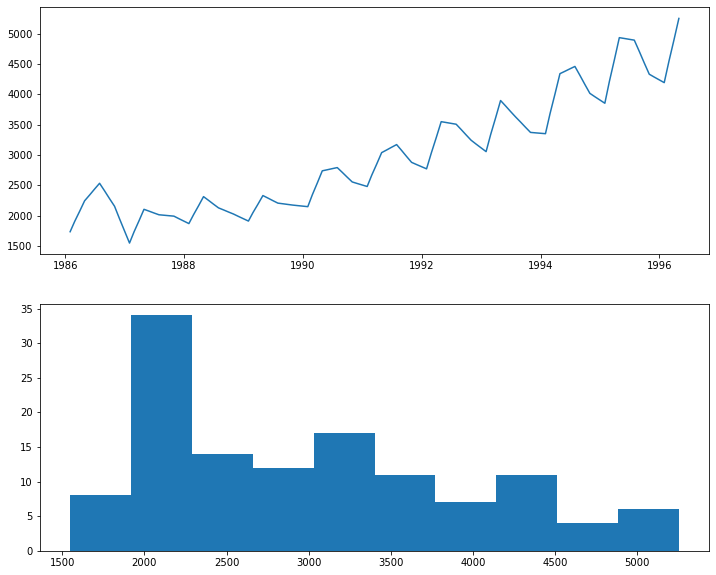

In [39]:
log = pd.DataFrame()
log = interpolated_month[['sale']]
log['Sales'] = np.log(log.sale)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['sale'])
#Histogram
plt.subplot(212)
plt.hist(log['sale'])
plt.show()

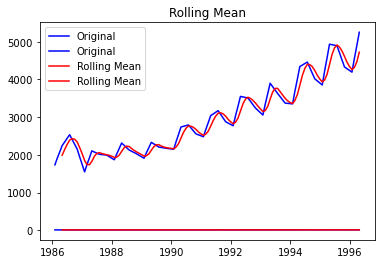

Results of Dickey Fuller Test:
Test Statistic                   0.572599
p-value                          0.986920
#Lags Used                      10.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


In [40]:
test_stationarity(log)

In [41]:
adf_test(log.Sales)

Fail to reject the null hypothesis
Data is non-stationary


# ARIMA Hyperparameter Tuning
# Forecasting

In [42]:
cc

,quar,sale,quarter_year,Date,quarters,month,year
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,Jan,1986
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,Apr,1986
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,Jul,1986
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,Oct,1986
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,Jan,1987
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2,Apr,1987
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3,Jul,1987
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4,Oct,1987
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1,Jan,1988
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2,Apr,1988


In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

# Splitting data

In [44]:
Train  =cc.head(32)
Test = cc.tail(10)

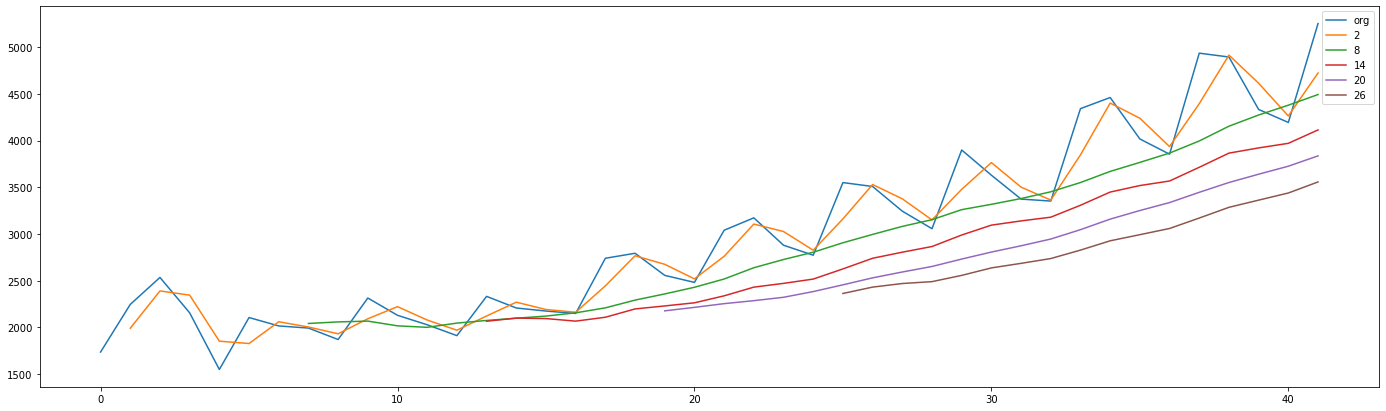

In [45]:
# Moving Average
plt.figure(figsize=(24,7))
cc.sale.plot(label="org")
for i in range(2,30,6):
    cc["sale"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [46]:
#Time series decomposition plot
len(Test)

10

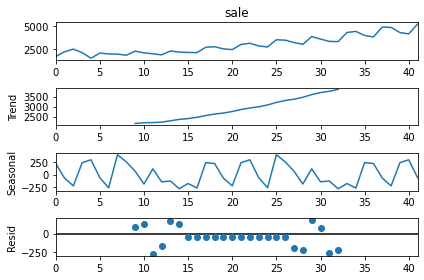

In [47]:
decompose_ts_add = seasonal_decompose(cc.sale,period= 18)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots

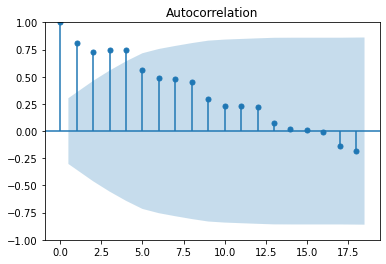

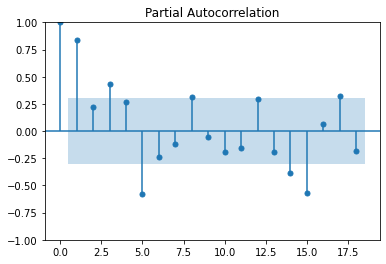

In [48]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cc.sale,lags=18)
tsa_plots.plot_pacf(cc.sale,lags=18)
plt.show()

In [49]:
# Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [50]:
#Simple Exponential Method
import numpy as np
ses_model = SimpleExpSmoothing(cc["sale"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.sale)


11.93932827469961

In [ ]:
# Final Model by combining train and test

In [51]:
hwe_model_add_add = ExponentialSmoothing(cc.sale,seasonal="add",trend="add",seasonal_periods=2).fit()

In [52]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

42    4853.303968
43    5156.073419
44    5077.996219
45    5380.765669
46    5302.688469
47    5605.457920
48    5527.380720
49    5830.150170
50    5752.072970
51    6054.842421
dtype: float64

# Forecasting Model_Arima

In [53]:
cc['quarter'] = 0
for i in range(42):
    p = cc['quar'][i]
    cc['quarter'][i] = p[0:2]

In [54]:
cc

,quar,sale,quarter_year,Date,quarters,month,year,quarter
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,Jan,1986,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,Apr,1986,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,Jul,1986,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,Oct,1986,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,Jan,1987,Q1
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2,Apr,1987,Q2
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3,Jul,1987,Q3
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4,Oct,1987,Q4
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1,Jan,1988,Q1
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2,Apr,1988,Q2


In [55]:
cc['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [56]:
cc_dummies = pd.DataFrame(pd.get_dummies(cc['quarter']), columns = ['Q1','Q2','Q3','Q4'])
cc = pd.concat([cc, cc_dummies], axis = 1)

In [57]:
cc.head()

,quar,sale,quarter_year,Date,quarters,month,year,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,Jan,1986,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,Apr,1986,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,Jul,1986,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,Oct,1986,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,Jan,1987,Q1,1,0,0,0


In [58]:
import numpy as np
cc['t'] = np.arange(1,43)
cc['t_squared'] = cc['t']**2
cc['sale_log'] = np.log(cc['sale'])
cc

,quar,sale,quarter_year,Date,quarters,month,year,quarter,Q1,Q2,Q3,Q4,t,t_squared,sale_log
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,Jan,1986,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,Apr,1986,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,Jul,1986,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,Oct,1986,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,Jan,1987,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2,Apr,1987,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3,Jul,1987,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4,Oct,1987,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1,Jan,1988,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2,Apr,1988,Q2,0,1,0,0,10,100,7.746574


In [59]:
train  =cc.head(32)
test = cc.tail(10)

# Models

In [60]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [61]:
# Linear Model
linear_model = smf.ols("sale~t", data = train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse = np.sqrt(mean_squared_error(np.array(test['sale']), np.array(linear_pred)))
linear_rmse

752.9233932767121

In [62]:
# Quadratic Model
quad_model = smf.ols("sale~t + t_squared", data = train).fit()
quad_pred = pd.Series(linear_model.predict(test['t']))
quad_rmse = np.sqrt(mean_squared_error(np.array(test['sale']), np.array(quad_pred)))
quad_rmse

752.9233932767121

In [63]:
# Exponential model
exp_model = smf.ols("sale_log~t", data = train).fit()
exp_pred = pd.Series(exp_model.predict(test['t']))
exp_rmse = np.sqrt(mean_squared_error(np.array(test['sale']), np.array(exp_pred)))
exp_rmse

4387.940544839098

In [64]:
#Additive seasonality 

add_sea = smf.ols('sale~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['sale'])-np.array(pred_add_sea))**2))
rmse_add_sea

1850.4665461858358

In [65]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('sale~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['sale'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

277.3510771128639

In [66]:
##Multiplicative Seasonality

Mul_sea = smf.ols('sale_log~Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['sale'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1908.250394836118

In [67]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('sale_log~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['sale'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

448.8678182692097

In [68]:
#Comparing the results 

data = {"MODEL":pd.Series(["rmse_linear", "rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_multi_add_sea"]), "RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,277.351077
6,rmse_multi_add_sea,448.867818
0,rmse_linear,752.923393
2,rmse_quad,752.923393
3,rmse_add_sea,1850.466546
5,rmse_Mult_sea,1908.250395
1,rmse_exp,4387.940545


# Using ARIMA

In [69]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx", header=0,index_col=0, parse_dates=True)
data.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [70]:
# Separate out a validation dataset
split_point = len(data)-7
dataset_cc, validation_cc = data[0:split_point], data[split_point:]
print('Dataset_cc %d, Validation_cc %d' % (len(dataset_cc), len(validation_cc)))

Dataset_cc 35, Validation_cc 7


In [71]:
dataset_cc.to_csv('dataset_cc.csv', header = False)
validation_cc.to_csv('Validation_cc.csv', header=False)

# Persistence/ Base model

In [72]:
# load data
from math import sqrt
train = pd.read_csv('dataset_cc.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Name: 1, dtype: float64

In [73]:
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# Validation

In [74]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# Observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected+%.3f' % (yhat, obs))
# Report Performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2148.278, Expected+2739.308
>Predicted=2739.308, Expected+2792.754
>Predicted=2792.754, Expected+2556.010
>Predicted=2556.010, Expected+2480.974
>Predicted=2480.974, Expected+3039.523
>Predicted=3039.523, Expected+3172.116
>Predicted=3172.116, Expected+2879.001
>Predicted=2879.001, Expected+2772.000
>Predicted=2772.000, Expected+3550.000
>Predicted=3550.000, Expected+3508.000
>Predicted=3508.000, Expected+3243.860
>Predicted=3243.860, Expected+3056.000
>Predicted=3056.000, Expected+3899.000
>Predicted=3899.000, Expected+3629.000
>Predicted=3629.000, Expected+3373.000
>Predicted=3373.000, Expected+3352.000
>Predicted=3352.000, Expected+4342.000
>Predicted=4342.000, Expected+4461.000
RMSE: 434.401


In [75]:
data = {"MODEL":pd.Series(["rmse_linear", "rmse_exp","rmse_quad","RMSE_ARIMA"]), "RMSE_Values":pd.Series([linear_rmse, exp_rmse,quad_rmse,rmse])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,RMSE_ARIMA,434.400665
0,rmse_linear,752.923393
2,rmse_quad,752.923393
1,rmse_exp,4387.940545
